In [4]:
!pip show deepxde tensorflow keras

Name: DeepXDE
Version: 1.14.0
Summary: A library for scientific machine learning
Home-page: https://github.com/lululxvi/deepxde
Author: 
Author-email: Lu Lu <lululxvi@gmail.com>
License: LGPL-2.1
Location: /opt/miniconda3/envs/sci/lib/python3.10/site-packages
Requires: matplotlib, numpy, scikit-learn, scikit-optimize, scipy
Required-by: 
---
Name: tensorflow
Version: 2.10.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/miniconda3/envs/sci/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
---
Name: keras
Version: 2.10.0
Summary: Deep learning for humans.
Home-pag

# Aproximación de Soluciones de Ecuaciones Diferenciales, utilizando Redes Neuronales

Investigación acerca del uso de redes neuronales para la aproximación de soluciones de ecuaciones diferenciales, iniciado como parte de una iniciación científica por profesores del Centro de Docencia de Ciencias Básicas para Ingeniería, de la Universidad Austral de Chile.

Profesores responsables: 

* **Juan Concha**

* **Daniel Sánchez**

---
## Bibliotecas

* ~~SciANN (Python)~~

* DeepXDE (Python)

* NeuralPDE.jl (Julia)


---
## Importante

Para el caso de SciANN y DeepXDE, ambos deben ser instalados en entornos virtuales distintos por la incompatibilidad de versiones entre Tensorflow y Keras.

Para ejecutar NeuralPDE.jl, se realizaron pruebas en un sistema Debian (GNU/Linux).

### Versión de Python utilizada para MacOS: Python 3.10.16

* Para instalar la versión dentro de un entorno ya creado a través de Conda:

``` bash 
conda install python=3.10  
```

* Para verificar la versión instalada:

``` bash 
python --version
```

### Versión de Python utilizada para Debian (GNU/Linux): Python 3.11.2


* Para verificar la versión instalada:

``` bash 
python --version
```

**Nota: Los códigos acá presentes se ejecutan dentro de un entorno virtual, con versiones específicas de Tensorflow, Keras y SciANN.**

### Versión de Julia utilizada para MacOS y Debian (GNU/Linux): Julia 1.11.5

* Para descargar Julia, ingrese al link https://julialang.org/downloads/

* Para verificar la versión instalada:

``` bash 
julia --version
```

## Versión de NeuralPDE.jl utilizada: NeuralPDE v5.18.1



---
## Instalación de SciANN

1. Instalar Tensorflow (2.10.1)

``` bash 
pip install "tensorflow>=2.10,<2.11" 
```

2. Instalar Keras (2.10.0)

``` bash 
pip install "keras<3.0,<2.11" 
```

3. Instalar SciANN (0.7.0.1)

``` bash 
pip install sciann 
```

4. Instalar Matplotlib (3.10.3)

``` bash 
pip install matplotlib 
```

## Instalación de DeepXDE

1. Instalar la última versión de DeepXDE. Para este trabajo (mayo de 2025), se ha utilizado la versión **1.14.0**

``` bash 
pip install deepxde
```

2. Instalar Tensorflow (2.19.0) (la ultima version disponible)

``` bash 
pip install tensorflow 
```

2. Instalar Keras (3.10.0) (la ultima version disponible)

``` bash 
pip install keras
```

4. Instalar Matplotlib (la ultima version disponible)

``` bash 
pip install matplotlib 
```

---
# Ejemplo 1: Resolución de una EDO Lineal de Primer Orden

Corresponde a un simple problema con solución analítica, implementada para probar la biblioteca SciANN.

Ecuación 1:

$$ \dfrac{dy}{dx} + y = 0, \quad y(0) = C$$

Solución general:

$$y(x) = C \cdot e^{-x}$$

Con $C$ una constante.

Una vez obtenida la predicción de la solución para la Ecuación 1, se realiza la gráfica (utilizando Matplotlib) para $C = 1$, $C = 2$, $C = 3$, $C = 4$, $C = 5$.

Las curvas generadas por SciANN están en los colores indicados. La curva de la solución exacta está en color negro.

## Código y Ejecución


2025-06-04 17:32:49.802919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term

Compiling model...
Building feed-forward neural network...
'build' took 0.105559 s



2025-06-04 17:32:58.322876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'compile' took 0.702167 s



2025-06-04 17:32:58.931370: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


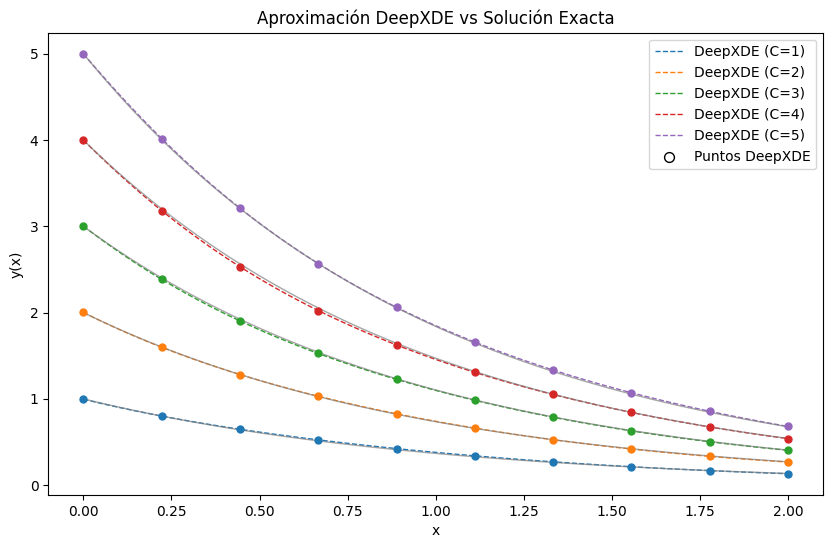

In [3]:
# Código Ejemplo 1

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import deepxde as dde

# Definir parámetros
IC_weight = 10.0

# Definir la ecuación diferencial
def pde(x, y):
    dy_dx = dde.grad.jacobian(y, x, i=0, j=0)
    residual_ode = dy_dx + y
    residual_ic = IC_weight * tf.exp(-100 * x[:, 0:1]**2) * (y - x[:, 1:2])
    return [residual_ode, residual_ic]

# Geometría 2D: x ∈ [0, 2], C ∈ [0.5, 5]
geom = dde.geometry.Rectangle([0, 0.5], [2, 5])

# Generar puntos de entrenamiento (iguales al código original)
x_train = np.linspace(0, 2, 10)
C_train = np.linspace(0.5, 5, 5)
X, Cc = np.meshgrid(x_train, C_train)
training_points = np.hstack((X.reshape(-1, 1), Cc.reshape(-1, 1)))

# Configurar datos PDE usando puntos específicos
data = dde.data.PDE(
    geom,
    pde,
    [],
    num_domain=0,
    anchors=training_points,
)

# Crear red neuronal
net = dde.maps.FNN(
    [2] + 4*[20] + [1],  # Capas: entrada 2, 4 ocultas de 20, salida 1
    "swish",
    "Glorot normal"
)

# Configurar modelo
model = dde.Model(data, net)
model.compile("adam", lr=0.01)

# Entrenamiento (400 épocas, batch completo)
losshistory, train_state = model.train(
    epochs=400,
    batch_size=training_points.shape[0],  # Usar todos los puntos en cada batch
    display_every=100,
    verbose=0
)

# Preparar datos para graficar
x_test = np.linspace(0, 2, 100)[:, None]
x_train_orig = x_train.reshape(-1, 1)
C_test_values = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))

# Graficar resultados para cada C
for c in C_test_values:
    # Predecir curva suave
    test_points = np.hstack((x_test, c * np.ones_like(x_test)))
    y_pred = model.predict(test_points)
    plt.plot(x_test, y_pred, '--', linewidth=1, label=f'DeepXDE (C={c})')
    
    # Predecir puntos de entrenamiento
    test_points_train = np.hstack((x_train_orig, c * np.ones_like(x_train_orig)))
    y_pred_points = model.predict(test_points_train)
    plt.scatter(
        x_train_orig,
        y_pred_points,
        marker='o',
        s=25,
        zorder=3,
        color=plt.gca().lines[-1].get_color()
    )
    
    # Solución exacta
    y_exact = c * np.exp(-x_test)
    plt.plot(x_test, y_exact, 'gray', linestyle='-', linewidth=1, alpha=0.7)

# Configuración final del gráfico
plt.scatter([], [], marker='o', s=50, edgecolors='k', 
            label='Puntos DeepXDE', facecolor='white')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Aproximación DeepXDE vs Solución Exacta')
plt.legend()
plt.show()

---
# Ejemplo 2: Comportamiento físico de un Circuito RC

Corresponde a un ejemplo de sistema eléctrico modelado, en el que se requieren soluciones **positivas**.

Orientado a modelar el comportamiento físico de un circuito RC no lineal, donde el voltaje del capacitor *V(t)* debe ser siempre positivo debido a la presencia de un diodo ideal. La ecuación diferencial incluye un término no lineal para modelar la disipación de energía, garantizando que *V(t)* sea mayor o igual a *0*.

Ecuación diferencial:

$$ \frac{dV}{dt} = -\frac{1}{RC} \cdot V^2 \quad\Leftrightarrow\quad \frac{dV}{dt} + \frac{1}{RC} \cdot V^2 = 0, \qquad V(0) = 5$$

donde

* $V(t)$: Voltaje en el capacitor (positivo por el diodo)  

* $R$: Resistencia no lineal (dependiente de $V$)  

* $C$: Capacitancia  

Solución analítica: $V(t) = \displaystyle\frac{V_0}{1 + \frac{V_0}{RC} t}$

## Código y Ejecución

Compiling model...
Building feed-forward neural network...
'build' took 0.118406 s

'compile' took 0.855317 s



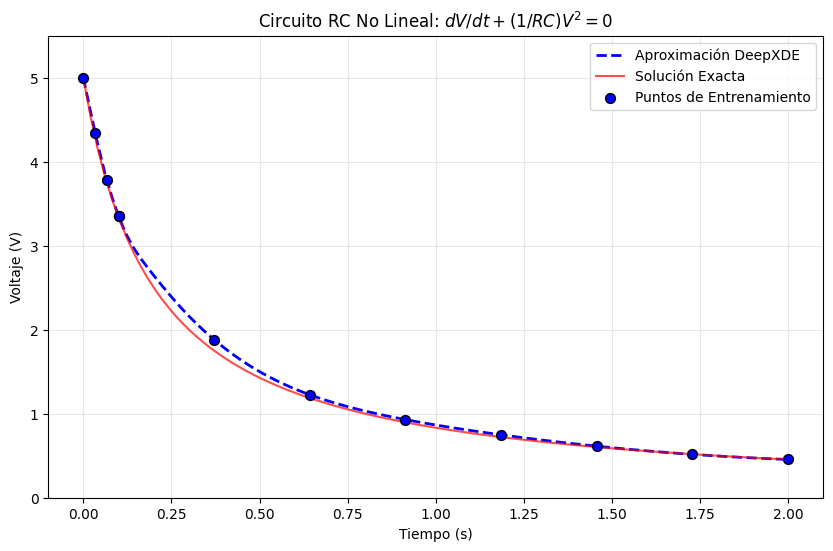

In [13]:
# Código Ejemplo 2

import deepxde as dde
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Parámetros físicos
R = 1.0  # Resistencia (Ω)
C = 1.0  # Capacitancia (F)
V0 = 5.0  # Voltaje inicial (V)

# Definir la ecuación diferencial (sin término de condición inicial)
def pde(x, y):
    dy_dt = dde.grad.jacobian(y, x, i=0, j=0)
    return dy_dt + (1/(R*C)) * (y ** 2)

# Transformación de salida para forzar V(0) = V0 exactamente
def output_transform(x, y):
    return V0 + x * y  # Garantiza que en x=0 (t=0), y = V0

# Dominio temporal: t ∈ [0, 2] segundos
geom = dde.geometry.TimeDomain(0, 2)

# Generar puntos de entrenamiento (más densos cerca de t=0)
# training_points = np.sort(np.concatenate([
#     np.linspace(0, 0.1, 10),  # Alta densidad cerca de t=0
#     np.linspace(0.1, 2, 15)    # Menor densidad en el resto
# ]))[:, None]

training_points = np.sort(np.concatenate([
    np.linspace(0, 0.1, 4),  # Alta densidad cerca de t=0
    np.linspace(0.1, 2, 8)    # Menor densidad en el resto
]))[:, None]

# Configurar datos PDE
data = dde.data.PDE(
    geom,
    pde,
    [],  # Sin condiciones adicionales (la transformación maneja IC)
    num_domain=0,
    num_boundary=0,
    anchors=training_points,
)

# Crear red neuronal (1 entrada: tiempo, 1 salida: voltaje)
net = dde.maps.FNN(
    [1] + [20] * 4 + [1],  # 1 entrada, 4 capas ocultas de 20 neuronas, 1 salida
    "tanh",  # Tangente hiperbólica funciona mejor para condiciones iniciales
    "Glorot normal"
)

# Aplicar transformación de salida
net.apply_output_transform(output_transform)

# Configurar modelo
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Entrenamiento (más épocas para mejor convergencia)
losshistory, train_state = model.train(
    epochs=2000,
    batch_size=training_points.shape[0],
    display_every=500,
    verbose=0
)

# Preparar datos para graficar
t_test = np.linspace(0, 2, 100)[:, None]

# Predicción y solución exacta
V_pred = model.predict(t_test)
V_exact = V0 / (1 + (V0/(R*C)) * t_test)

# Graficar resultados
plt.figure(figsize=(10, 6))

# Curvas principales
plt.plot(t_test, V_pred, 'b--', linewidth=2, label='Aproximación DeepXDE')
plt.plot(t_test, V_exact, 'r-', linewidth=1.5, alpha=0.7, label='Solución Exacta')

# Puntos de entrenamiento
V_train = model.predict(training_points)
plt.scatter(training_points, V_train, c='blue', s=50, 
            edgecolors='k', zorder=3, label='Puntos de Entrenamiento')

# Destacar condición inicial
# plt.scatter([0], [V0], c='green', s=150, marker='*', 
            # edgecolors='k', zorder=4, label='Condición Inicial (V0=5V)')

# Configuración del gráfico
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Circuito RC No Lineal: $dV/dt + (1/RC)V^2 = 0$')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.ylim(0, V0+0.5)

# print(f"text: {V_train}")

# Añadir información de parámetros
# textstr = '\n'.join((
#     r'$V_0 = %.1f$ V' % V0,
#     r'$R = %.1f$ $\Omega$' % R,
#     r'$C = %.1f$ F' % C,
#     r'Solución exacta:',
#     r'$V(t) = \frac{%.1f}{1 + %.1f t}$' % (V0, V0/(R*C))))
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# plt.text(1.25, 4.0, textstr, fontsize=12, verticalalignment='top', bbox=props)

# Insertar zoom cerca de t=0
# ax_inset = plt.axes([0.25, 0.5, 0.3, 0.3])
# ax_inset.plot(t_test, V_pred, 'b--')
# ax_inset.plot(t_test, V_exact, 'r-')
# ax_inset.scatter(training_points, V_train, c='blue', s=30, edgecolors='k')
# ax_inset.scatter([0], [V0], c='green', s=80, marker='*', edgecolors='k')
# ax_inset.set_xlim(-0.02, 0.1)
# ax_inset.set_ylim(4.95, 5.05)
# ax_inset.grid(alpha=0.2)
# ax_inset.set_title('Zoom cerca de t=0')

# plt.tight_layout()
plt.show()

---
## Ejemplo 3: Ecuación stiff (Sistema EDO)

Corresponde a un problema stiff. Para este caso, se utilizó DeepXDE. 

### Ecuaciones

$$\frac{dy_1}{dx} = -16y_1 + 12y_2 + 16cos(x) - 13sin(x), \quad y_1(0) = 1,$$  

$$\frac{dy_2}{dx} = 12y_1 - 9y_2 - 11cos(x) + 9sin(x), \quad y_2(0) = 0 $$

### Solución analítica exacta:

$$\quad y_1 = cos(x), \quad y_2 = sin(x)$$

## Código y Ejecución

Compiling model...
Building feed-forward neural network...
'build' took 0.120394 s

'compile' took 1.552433 s



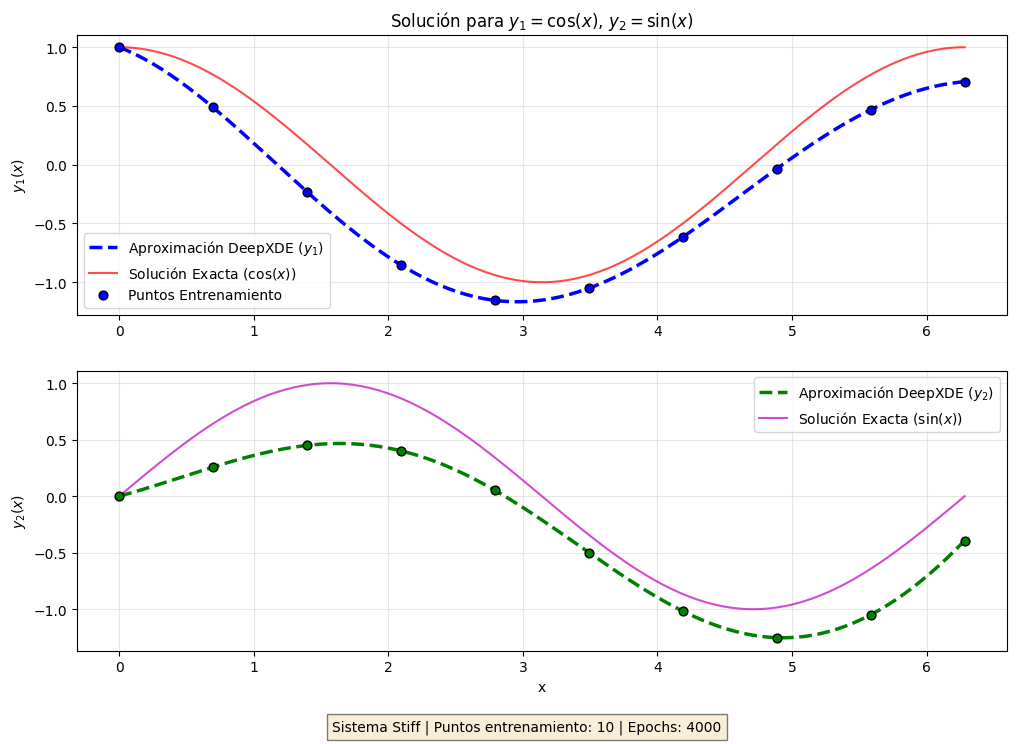

In [12]:
# Código Ejemplo 3

import deepxde as dde
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del sistema de ecuaciones stiff
def pde(x, y):
    y1, y2 = y[:, 0:1], y[:, 1:2]  # Separar las dos salidas
    
    # Derivadas
    dy1_dx = dde.grad.jacobian(y, x, i=0, j=0)
    dy2_dx = dde.grad.jacobian(y, x, i=1, j=0)
    
    # USAR FUNCIONES TENSORFLOW EN LUGAR DE NUMPY
    # Ecuaciones diferenciales
    eq1 = dy1_dx - (-16*y1 + 12*y2 + 16*tf.cos(x) - 13*tf.sin(x))
    eq2 = dy2_dx - (12*y1 - 9*y2 - 11*tf.cos(x) + 9*tf.sin(x))
    
    return [eq1, eq2]

# Transformación de salida para forzar condiciones iniciales
def output_transform(x, y):
    y1 = 1 + x * y[:, 0:1]  # Forzar y1(0) = 1
    y2 = 0 + x * y[:, 1:2]  # Forzar y2(0) = 0
    return tf.concat([y1, y2], axis=1)

# Dominio: x ∈ [0, 2π]
geom = dde.geometry.TimeDomain(0, 2*np.pi)

# Puntos de entrenamiento (más densos cerca de x=0)
# training_points = np.sort(np.concatenate([
#     np.linspace(0, 0.5, 15),         # Alta densidad cerca de x=0
#     np.linspace(0.5, 2*np.pi, 35)    # Menor densidad en el resto
# ]))[:, None]

training_points = np.sort(np.concatenate([
    np.linspace(0, 2 * np.pi, 10)    # Menor densidad en el resto
]))[:, None]

# Configuración de datos PDE
data = dde.data.PDE(
    geom,
    pde,
    [],  # Sin condiciones adicionales (transformación maneja ICs)
    num_domain=0,
    num_boundary=0,
    anchors=training_points,
)

# Arquitectura de red (1 entrada, 4 capas ocultas de 64 neuronas, 2 salidas)
net = dde.maps.FNN([1] + [64]*4 + [2], "swish", "Glorot normal")
net.apply_output_transform(output_transform)

# Compilación y entrenamiento
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Entrenamiento con más épocas para sistema stiff
losshistory, train_state = model.train(
    epochs=4000,
    batch_size=len(training_points),
    display_every=500,
    # callbacks=[dde.callbacks.EarlyStopping(min_delta=1e-6, patience=1000)],
    verbose=0
)

# Validación y gráficos
x_test = np.linspace(0, 2*np.pi, 200)[:, None]
y_pred = model.predict(x_test)

# Soluciones exactas
y1_exact = np.cos(x_test)
y2_exact = np.sin(x_test)

# Crear figura con 2 subgráficos
plt.figure(figsize=(12, 8))

# Gráfico para y1
plt.subplot(2, 1, 1)
plt.plot(x_test, y_pred[:, 0], 'b--', linewidth=2.5, label='Aproximación DeepXDE ($y_1$)')
plt.plot(x_test, y1_exact, 'r-', linewidth=1.5, alpha=0.7, label='Solución Exacta ($\cos(x)$)')
plt.scatter(training_points, model.predict(training_points)[:, 0], 
            c='blue', s=40, edgecolors='k', zorder=3, label='Puntos Entrenamiento')

plt.ylabel('$y_1(x)$')
plt.grid(alpha=0.3)
plt.legend()
plt.title('Solución para $y_1 = \cos(x)$, $y_2 = \sin(x)$')

# Gráfico para y2
plt.subplot(2, 1, 2)
plt.plot(x_test, y_pred[:, 1], 'g--', linewidth=2.5, label='Aproximación DeepXDE ($y_2$)')
plt.plot(x_test, y2_exact, 'm-', linewidth=1.5, alpha=0.7, label='Solución Exacta ($\sin(x)$)')
plt.scatter(training_points, model.predict(training_points)[:, 1], 
            c='green', s=40, edgecolors='k', zorder=3)

plt.xlabel('x')
plt.ylabel('$y_2(x)$')
plt.grid(alpha=0.3)
plt.legend()

# Añadir información del sistema
plt.figtext(0.5, 0.01, 
            f'Sistema Stiff | Puntos entrenamiento: {len(training_points)} | '
            f'Epochs: 4000',
            # f'Pérdida final: {losshistory.loss_train[-1][0]:.2e}',
            ha='center', fontsize=10, bbox=dict(facecolor='wheat', alpha=0.5))

# plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()